<a href="https://colab.research.google.com/github/vimalkumarasamy/computer_vision/blob/master/CV_Task2_Hope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Computer_Vision

/content/gdrive/My Drive/Computer_Vision


In [0]:
import argparse
import copy
import os
import cv2
import numpy as np
import utils
from task1 import *
from matplotlib import pyplot as plt

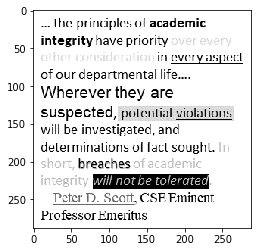

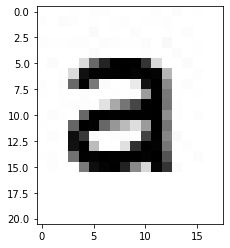

In [11]:
img=read_image('proj1-task2-png.png')
template=read_image('a_new.jpg')
plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(template, cmap="gray")
plt.show()

In [0]:
# Noise Cancellation
a=np.array([[1,2,1]])
b=np.array([[1],[2],[1]])
gaussian=np.matmul(b,a)

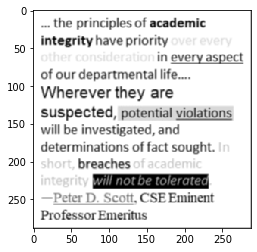

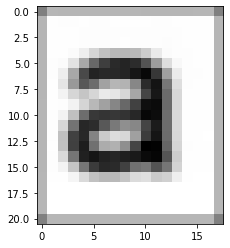

In [37]:
img_noise_reduced=convolve2d(img,gaussian)
plt.imshow(normalize(img_noise_reduced), cmap="gray")
plt.show()

template_noise_reduced=convolve2d(template,gaussian)
plt.imshow(normalize(template_noise_reduced), cmap="gray")
plt.show()

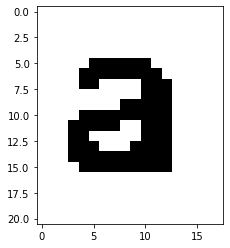

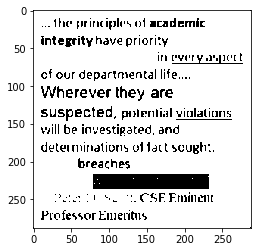

In [51]:
# Thresholding
template_noise_reduced=normalize(template_noise_reduced)
template_threshold=copy.deepcopy(template_noise_reduced)
for i in range(len(template_noise_reduced)):
  for j in range(len(template_noise_reduced[0])):
    if template_noise_reduced[i][j]<125:
      template_threshold[i][j]=0
    else:
      template_threshold[i][j]=255
plt.imshow(template_threshold, cmap="gray")
plt.show()


img_noise_reduced=normalize(img_noise_reduced)
img_threshold=copy.deepcopy(img_noise_reduced)
for i in range(len(img_noise_reduced)):
  for j in range(len(img_noise_reduced[0])):
    if img_noise_reduced[i][j]<150:
      img_threshold[i][j]=0
    else:
      img_threshold[i][j]=255
plt.imshow(img_threshold, cmap="gray")
plt.show()



In [0]:
def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product
  
def ncc(image,temp):
  import numpy as np
  t_np=np.array(temp)
  i_np=np.array(image)
  t_np=t_np/t_np.sum()
  i_l=len(image)
  i_b=len(image[0])
  t_l=len(temp)
  t_b=len(temp[0])
  ncc_mat=np.zeros((i_l-t_l+1,i_b-t_b+1)).tolist()
  for i in range(i_l-t_l+1):
    for j in range(i_b-t_b+1):
      ncc_mat[i][j]=correlation_coefficient(i_np[i:i+t_l,j:j+t_b],t_np)
  return(ncc_mat)

In [0]:
img_ncc=ncc(img_noise_reduced,template_threshold)

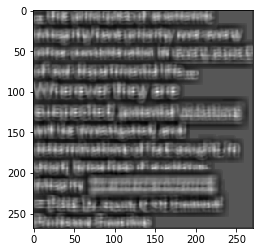

In [55]:
plt.imshow(img_ncc, cmap="gray")
plt.show()

In [57]:
mx=0
for i in range(len(img_ncc)):
  for j in range(len(img_ncc[0])):
    if img_ncc[i][j]>mx:
      mx=img_ncc[i][j]
      l=i
      b=j

print(mx,l,b)


0.7948170880593575 100 153
